In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

# Change to your desired folder
os.chdir('/content/drive/My Drive/Time series Analysis/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
ls

 B2.xlsx                              'Part 1 Linear Regression time series.ipynb'
 B.xlsx                               'Part 2 Regression with Time.ipynb'
'Copy of Regression with Time.ipynb'   Tutorial_1
 C.xlsx                                Tutorial_2
 D.csv


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('D.csv')
df

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9
...,...,...
67,2006-08-01,520.7
68,2006-09-01,508.0
69,2006-10-01,482.6
70,2006-11-01,457.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Years   72 non-null     object 
 1   Sales   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


## Data Preprocessing

In [17]:
df['Years'] = pd.to_datetime(df['Years'])

In [18]:
df.dtypes

,0
Years,datetime64[ns]
Sales,float64


In [19]:
df['time'] = np.arange(1,73,1)

In [61]:
df.head()


,Sales,time,month_name
Years,,,
2001-01-01,139.7,1,January
2001-02-01,114.3,2,February
2001-03-01,101.6,3,March
2001-04-01,152.4,4,April
2001-05-01,215.9,5,May


In [21]:
df['month_name'] = df['Years'].dt.month_name()

In [62]:
df.head(15)

,Sales,time,month_name
Years,,,
2001-01-01,139.7,1,January
2001-02-01,114.3,2,February
2001-03-01,101.6,3,March
2001-04-01,152.4,4,April
2001-05-01,215.9,5,May
2001-06-01,228.6,6,June
2001-07-01,215.9,7,July
2001-08-01,190.5,8,August
2001-09-01,177.8,9,September


**split the data into indepdent and dependent**

In [25]:
# Step-1: Split the data into train (4 years) and test (2 years)
df_train = df.head(48) # 4 years
df_test = df.loc[48:] # 2 years

In [26]:
print(df_train.head())
print(df_test.head())

       Years  Sales  time month_name
0 2001-01-01  139.7     1    January
1 2001-02-01  114.3     2   February
2 2001-03-01  101.6     3      March
3 2001-04-01  152.4     4      April
4 2001-05-01  215.9     5        May
        Years  Sales  time month_name
48 2005-01-01  266.7    49    January
49 2005-02-01  317.5    50   February
50 2005-03-01  368.3    51      March
51 2005-04-01  431.8    52      April
52 2005-05-01  457.2    53        May


In [59]:
df_test.head()


KeyError: 'Years'

In [28]:
x_train = df_train[['time']].values
x_train.shape

(48, 1)

In [29]:
y_train = df_train['Sales'].values
y_train.shape

(48,)

In [30]:
x_test = df_test[['time']].values
y_test = df_test['Sales'].values

# Linear Regression with Time
- Trend in the data

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model_trend = LinearRegression()
model_trend.fit(x_train,y_train)

LinearRegression()

In [33]:
y_fittedvalue = model_trend.predict(x_train)

In [34]:
y_forecast = model_trend.predict(x_test)

**confidence interval - 95% = 1.96**

CI = $\mu +- ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = standard deviation of the error

In [35]:
# confidence interval
# mean +- Margin of error
error = y_train - y_fittedvalue
se = error.std()
ME = 1.96 * se

<ipython-input-36-528071584fde>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test['Years'],y_forecast,'b',color='red')


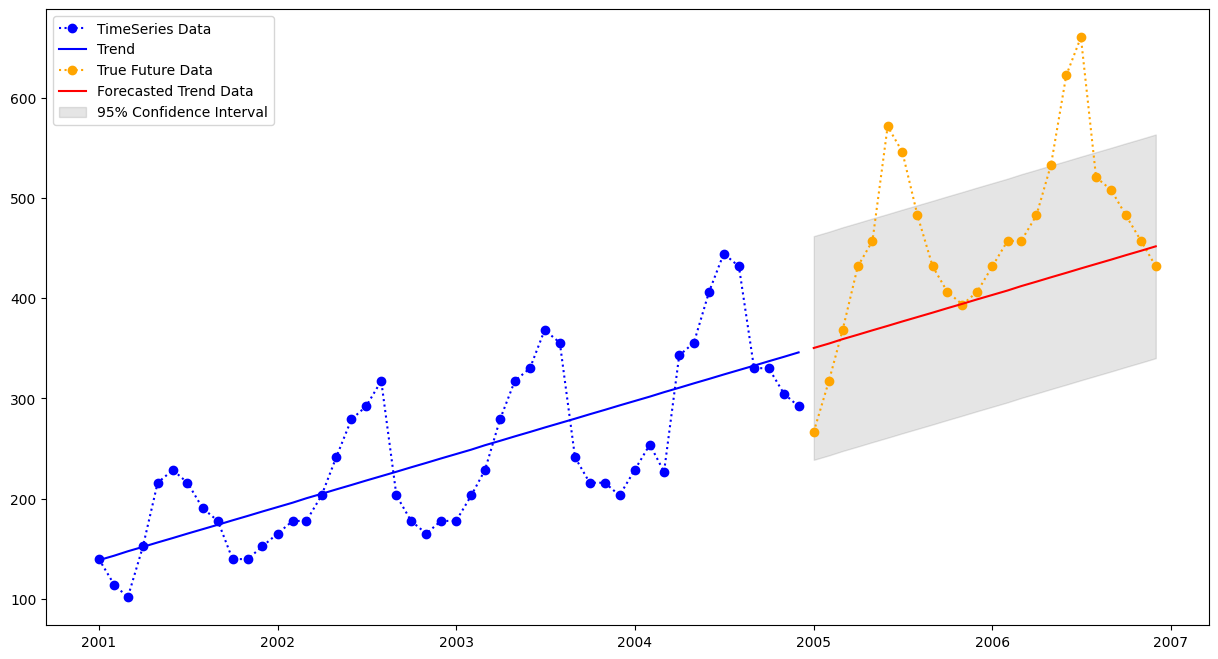

In [36]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df_train['Years'],y_train,'bo:')
plt.plot(df_train['Years'],y_fittedvalue,'b')
# forecasted data
plt.plot(df_test['Years'],y_test,'o:',color='orange')
plt.plot(df_test['Years'],y_forecast,'b',color='red')
# margin of error
ci_plus = y_forecast + ME
ci_minus = y_forecast - ME
plt.fill_between(df_test['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')


plt.legend(['TimeSeries Data','Trend','True Future Data','Forecasted Trend Data','95% Confidence Interval'])
plt.show()

In [37]:
# 2006-01-01    431.8   61
forecast_mean = model_trend.predict(np.array([[61]]))

In [38]:
print(forecast_mean)
print((forecast_mean - ME , forecast_mean + ME))

[403.28613765]
(array([291.67694148]), array([514.89533381]))


## Additive Model

In [39]:
df_train.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [40]:
df_train['month_name'][0]

'January'

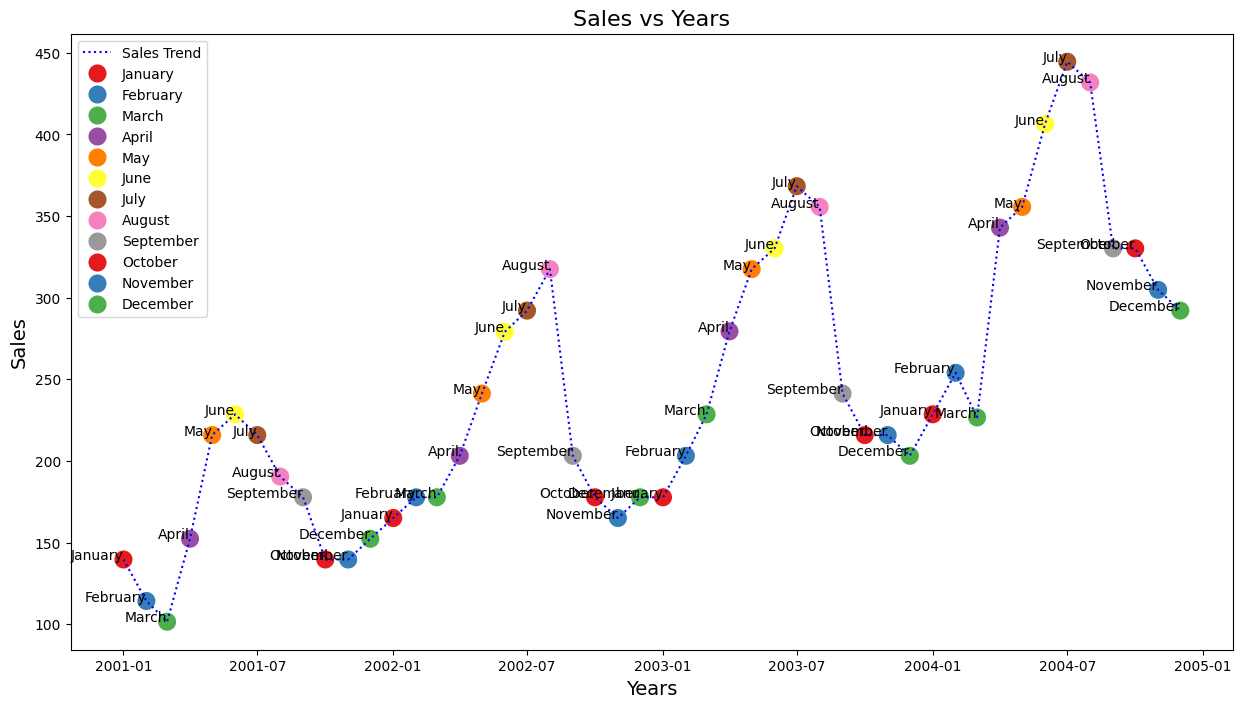

In [41]:

plt.figure(figsize=(15, 8))

# Line plot
plt.plot(df_train['Years'], df_train['Sales'], 'b:', label='Sales Trend')

# Scatter plot
sns.scatterplot(x='Years', y='Sales', data=df_train, s=200, hue='month_name', palette='Set1')

# Adding text annotations
for i in range(len(df_train)):
    plt.text(df_train['Years'].iloc[i], df_train['Sales'].iloc[i], df_train['month_name'].iloc[i],
             fontsize=10, ha='right', color='black')

# Labels and title
plt.xlabel('Years', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.title('Sales vs Years', fontsize=16)
plt.legend()
plt.show()

seasonality is 12 hence we need to create n-1 dummies , 11 columns

In [42]:
dum = pd.get_dummies(df_train['month_name'],drop_first=True)
df_train1 = df_train.copy()
df_train1 = pd.concat((df_train1,dum),axis=1)

In [63]:
df_train1.head()

,Years,Sales,time,month_name,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,False,False,False,True,False,False,False,False,False,False,False
1,2001-02-01,114.3,2,February,False,False,True,False,False,False,False,False,False,False,False
2,2001-03-01,101.6,3,March,False,False,False,False,False,False,True,False,False,False,False
3,2001-04-01,152.4,4,April,False,False,False,False,False,False,False,False,False,False,False
4,2001-05-01,215.9,5,May,False,False,False,False,False,False,False,True,False,False,False


In [43]:
dum = pd.get_dummies(df_test['month_name'],drop_first=True)
df_test1 = df_test.copy()
df_test1 = pd.concat((df_test1,dum),axis=1)

In [44]:
df_test1

,Years,Sales,time,month_name,August,December,February,January,July,June,March,May,November,October,September
48,2005-01-01,266.7,49,January,False,False,False,True,False,False,False,False,False,False,False
49,2005-02-01,317.5,50,February,False,False,True,False,False,False,False,False,False,False,False
50,2005-03-01,368.3,51,March,False,False,False,False,False,False,True,False,False,False,False
51,2005-04-01,431.8,52,April,False,False,False,False,False,False,False,False,False,False,False
52,2005-05-01,457.2,53,May,False,False,False,False,False,False,False,True,False,False,False
53,2005-06-01,571.5,54,June,False,False,False,False,False,True,False,False,False,False,False
54,2005-07-01,546.1,55,July,False,False,False,False,True,False,False,False,False,False,False
55,2005-08-01,482.6,56,August,True,False,False,False,False,False,False,False,False,False,False
56,2005-09-01,431.8,57,September,False,False,False,False,False,False,False,False,False,False,True
57,2005-10-01,406.4,58,October,False,False,False,False,False,False,False,False,False,True,False


In [45]:
df_train1

,Years,Sales,time,month_name,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,False,False,False,True,False,False,False,False,False,False,False
1,2001-02-01,114.3,2,February,False,False,True,False,False,False,False,False,False,False,False
2,2001-03-01,101.6,3,March,False,False,False,False,False,False,True,False,False,False,False
3,2001-04-01,152.4,4,April,False,False,False,False,False,False,False,False,False,False,False
4,2001-05-01,215.9,5,May,False,False,False,False,False,False,False,True,False,False,False
5,2001-06-01,228.6,6,June,False,False,False,False,False,True,False,False,False,False,False
6,2001-07-01,215.9,7,July,False,False,False,False,True,False,False,False,False,False,False
7,2001-08-01,190.5,8,August,True,False,False,False,False,False,False,False,False,False,False
8,2001-09-01,177.8,9,September,False,False,False,False,False,False,False,False,False,False,True
9,2001-10-01,139.7,10,October,False,False,False,False,False,False,False,False,False,True,False


In [46]:
# split the data into independent and dependent
cols =['time','August'	,'December',	'February',	'January',	'July',	'June',	'March','May'	,'November'	,'October',	'September']
x_train_add = df_train1[cols].values
x_test_add = df_test1[cols].values
y_train_add = df_train1['Sales'].values
y_test_add = df_test1['Sales'].values

In [47]:
x_train_add.shape, x_test_add.shape, y_train_add.shape, y_test_add.shape

((48, 12), (24, 12), (48,), (24,))

**Additive Model (Linear Regression)**

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model_add = LinearRegression()
model_add.fit(x_train_add,y_train_add)

LinearRegression()

In [50]:
# fitted values
y_fittedvalue_add = model_add.predict(x_train_add)
# forecasted values
y_forecast_add = model_add.predict(x_test_add)

In [51]:
# margin of error
# ME = 1.96* SE
error = y_train_add - y_fittedvalue_add
SE = error.std()
ME = 1.96 * SE

<ipython-input-52-8ceee0d3b835>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test1['Years'],y_forecast_add,'b',color='red')


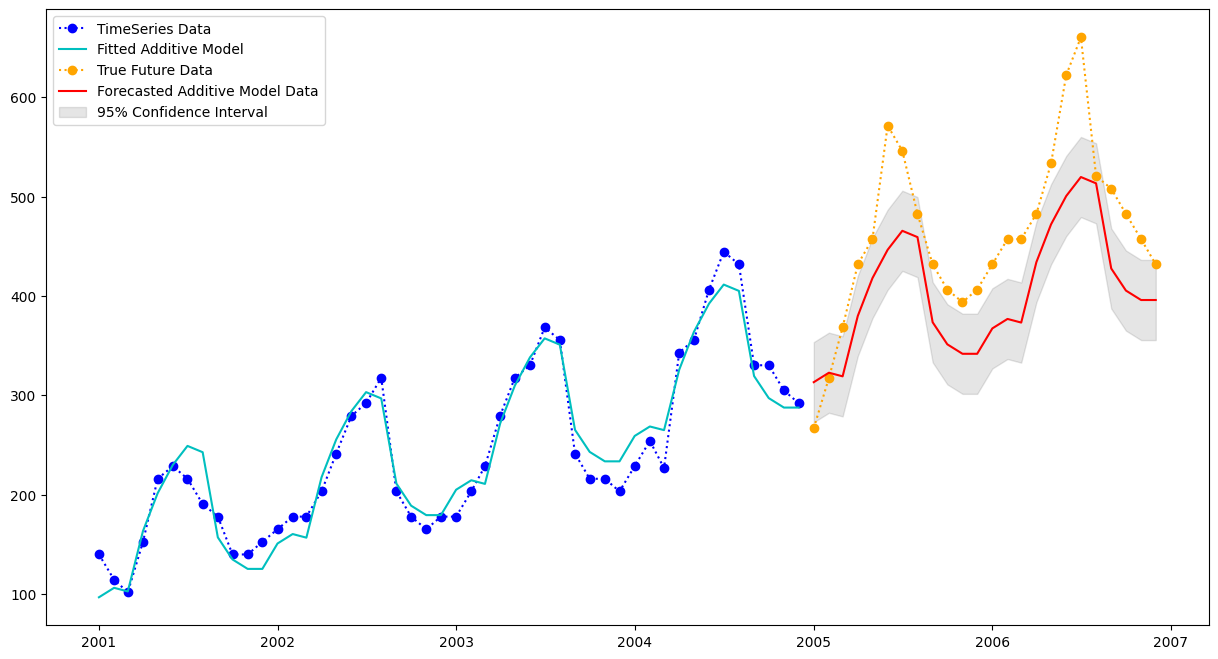

In [52]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df_train1['Years'],y_train_add,'bo:')
plt.plot(df_train1['Years'],y_fittedvalue_add,'c')
# forecasted data
plt.plot(df_test1['Years'],y_test_add,'o:',color='orange')
plt.plot(df_test1['Years'],y_forecast_add,'b',color='red')
# margin of error
ci_plus = y_forecast_add + ME
ci_minus = y_forecast_add - ME
plt.fill_between(df_test1['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')


plt.legend(['TimeSeries Data','Fitted Additive Model','True Future Data','Forecasted Additive Model Data','95% Confidence Interval'])
plt.show()

# Multiplicative Model for Forecasting

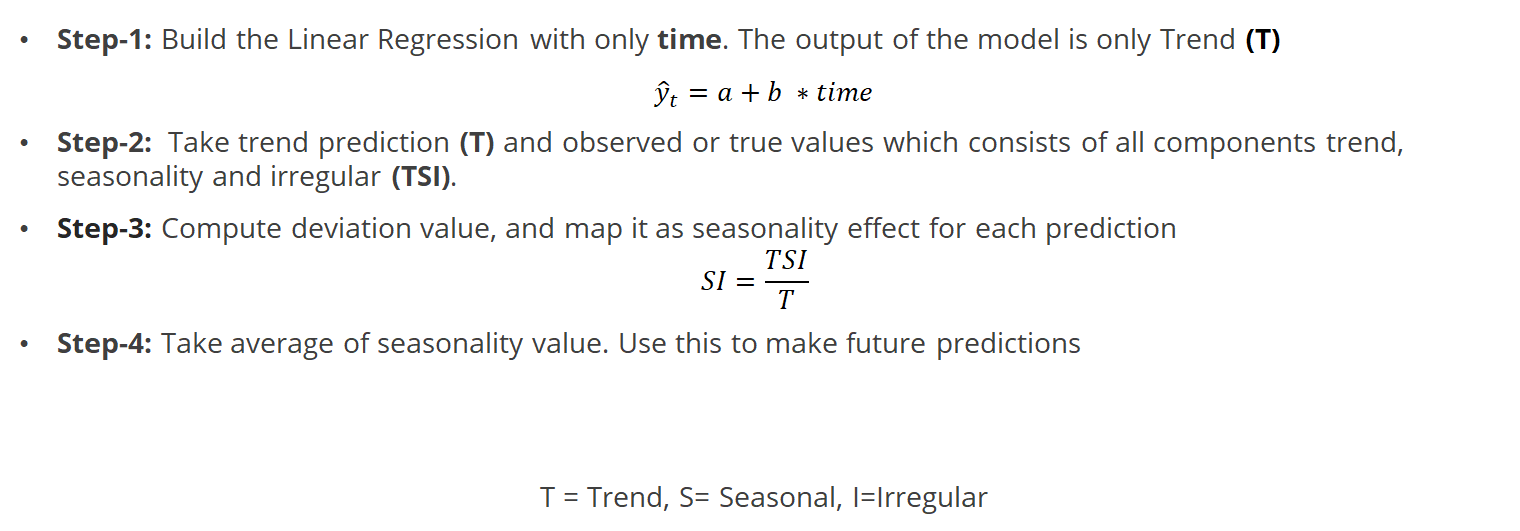

In [64]:
df_train.tail()

,Years,Sales,time,month_name
43,2004-08-01,431.8,44,August
44,2004-09-01,330.2,45,September
45,2004-10-01,330.2,46,October
46,2004-11-01,304.8,47,November
47,2004-12-01,292.1,48,December


In [65]:
df_test.head()

,Years,Sales,time,month_name
48,2005-01-01,266.7,49,January
49,2005-02-01,317.5,50,February
50,2005-03-01,368.3,51,March
51,2005-04-01,431.8,52,April
52,2005-05-01,457.2,53,May


**Step-1: Linear Regression with time and Sales**

In [66]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [67]:
X_t = df_train2[['time']].values
y_true_mul = df_train2['Sales'].values

X_t.shape, y_true_mul.shape

((48, 1), (48,))

In [68]:
X_t_test = df_test2[['time']].values
y_true_test_mul = df_test2['Sales'].values

X_t_test.shape, y_true_test_mul.shape

((24, 1), (24,))

In [69]:
from sklearn.linear_model import LinearRegression
model_trend_mul = LinearRegression()
model_trend_mul.fit(X_t,y_true_mul)

LinearRegression()

**Step-2: Take Trend (T) and TSI (True Sample)**

In [70]:
y_fittedvalues_trend = model_trend_mul.predict(X_t)

In [71]:
df_train2['predicted_T'] = y_fittedvalues_trend
df_train2.head()

,Years,Sales,time,month_name,predicted_T
0,2001-01-01,139.7,1,January,138.671939
1,2001-02-01,114.3,2,February,143.082175
2,2001-03-01,101.6,3,March,147.492412
3,2001-04-01,152.4,4,April,151.902649
4,2001-05-01,215.9,5,May,156.312885


**Step-3: Deviation to TSI**

SI = $\frac{TSI}{ T}$

In [72]:
df_train2['SI'] = df_train2['Sales'] / df_train2['predicted_T']
df_train2.head(20)

,Years,Sales,time,month_name,predicted_T,SI
0,2001-01-01,139.7,1,January,138.671939,1.007414
1,2001-02-01,114.3,2,February,143.082175,0.798842
2,2001-03-01,101.6,3,March,147.492412,0.688849
3,2001-04-01,152.4,4,April,151.902649,1.003274
4,2001-05-01,215.9,5,May,156.312885,1.381204
5,2001-06-01,228.6,6,June,160.723122,1.422322
6,2001-07-01,215.9,7,July,165.133359,1.307428
7,2001-08-01,190.5,8,August,169.543595,1.123605
8,2001-09-01,177.8,9,September,173.953832,1.022110
9,2001-10-01,139.7,10,October,178.364069,0.783229


**Step-4: Avg Seasonal Deviation**

In [73]:
deviation_season = df_train2[['month_name','SI']].groupby(by='month_name').mean().rename(columns={'SI':'correction_factor'})
deviation_season

,correction_factor
month_name,
April,1.045770
August,1.289315
December,0.773112
February,0.840934
January,0.841208
July,1.344616
June,1.309853
March,0.804644
May,1.218536


**Step-5: Computing the Fitted Values**

In [74]:
df_train2 = df_train2.merge(deviation_season,on='month_name')

In [75]:
df_train2.head()

,Years,Sales,time,month_name,predicted_T,SI,correction_factor
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208
1,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934
2,2001-03-01,101.6,3,March,147.492412,0.688849,0.804644
3,2001-04-01,152.4,4,April,151.902649,1.003274,1.045770
4,2001-05-01,215.9,5,May,156.312885,1.381204,1.218536


In [76]:
df_train2['Fitted_values'] = df_train2['predicted_T'] * df_train2['correction_factor']

In [77]:
df_train2.head()

,Years,Sales,time,month_name,predicted_T,SI,correction_factor,Fitted_values
0,2001-01-01,139.7,1,January,138.671939,1.007414,0.841208,116.651919
1,2001-02-01,114.3,2,February,143.082175,0.798842,0.840934,120.322726
2,2001-03-01,101.6,3,March,147.492412,0.688849,0.804644,118.678920
3,2001-04-01,152.4,4,April,151.902649,1.003274,1.045770,158.855260
4,2001-05-01,215.9,5,May,156.312885,1.381204,1.218536,190.472924


**Forecasting**

In [78]:
ftrend = model_trend_mul.predict(X_t_test)
df_test2['Forecasted_Trend']= ftrend
df_test2.head()

,Years,Sales,time,month_name,Forecasted_Trend
48,2005-01-01,266.7,49,January,350.363298
49,2005-02-01,317.5,50,February,354.773535
50,2005-03-01,368.3,51,March,359.183771
51,2005-04-01,431.8,52,April,363.594008
52,2005-05-01,457.2,53,May,368.004244


In [79]:
df_test2 = pd.merge(df_test2,deviation_season,on='month_name')
df_test2.head()

,Years,Sales,time,month_name,Forecasted_Trend,correction_factor
0,2005-01-01,266.7,49,January,350.363298,0.841208
1,2005-02-01,317.5,50,February,354.773535,0.840934
2,2005-03-01,368.3,51,March,359.183771,0.804644
3,2005-04-01,431.8,52,April,363.594008,1.045770
4,2005-05-01,457.2,53,May,368.004244,1.218536


In [80]:
df_test2['Forecasted_mul'] = df_test2['Forecasted_Trend'] * df_test2['correction_factor']
df_test2.head()

,Years,Sales,time,month_name,Forecasted_Trend,correction_factor,Forecasted_mul
0,2005-01-01,266.7,49,January,350.363298,0.841208,294.728346
1,2005-02-01,317.5,50,February,354.773535,0.840934,298.341276
2,2005-03-01,368.3,51,March,359.183771,0.804644,289.015154
3,2005-04-01,431.8,52,April,363.594008,1.045770,380.235769
4,2005-05-01,457.2,53,May,368.004244,1.218536,448.426528


In [81]:
# margin error (train)
# ME = 1.96 * SE
# SE =
error = df_train2['Sales'] - df_train2['Fitted_values']
SE = error.std()
ME = 1.96*SE
print(ME)

36.42544715050407


In [82]:
df_train2.sort_values(by='Years',inplace=True)
df_test2.sort_values(by='Years',inplace=True)

<ipython-input-84-92098f79d54e>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(df_test2['Years'],df_test2['Forecasted_mul'],'b',color='red')


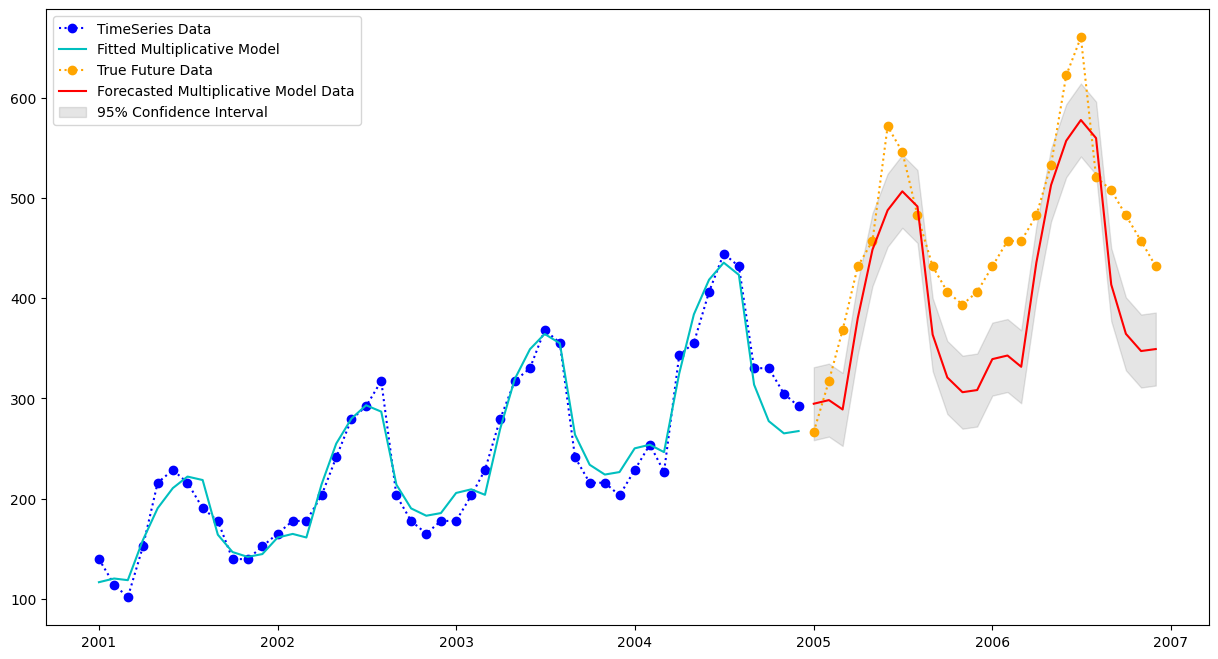

In [84]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df_train2['Years'],df_train2['Sales'],'bo:')
plt.plot(df_train2['Years'],df_train2['Fitted_values'],'c') # fitted
# forecasted data
plt.plot(df_test2['Years'],df_test2['Sales'],'o:',color='orange')
plt.plot(df_test2['Years'],df_test2['Forecasted_mul'],'b',color='red')
# margin of error
ci_plus = df_test2['Forecasted_mul'] + ME
ci_minus = df_test2['Forecasted_mul'] - ME
plt.fill_between(df_test1['Years'],(ci_plus),(ci_minus),alpha=0.1,color='black')


plt.legend(['TimeSeries Data','Fitted Multiplicative Model','True Future Data','Forecasted Multiplicative Model Data','95% Confidence Interval'])
plt.show()